# Generación de Máscaras
La gracia de ese código es que busque todas las imágenes `truecolor.png` dentro de las distintas carpetas de Detecciones

# Importar Librerías y Obtener Datos de Imágenes

Estos primeros bloques importan librerías necesarias y además busca las imágenes `truecolor.png` que están ubicadas dentro la carpeta `Detecciones`, desde ahí, se copia el path completo, y genera un dataframe con dicho path, la región donde pertenece la imagen satelital, las coordenadas de esta, y el rango de fechas en que fue obtenida la imagen.

In [1]:
import os
import pandas as pd
import re
import numpy as np
from ultralytics import YOLO

In [2]:
def find_truecolor_images(root_folder):
    truecolor_images = []
    for root, dirs, files in os.walk(root_folder):
        for file in files:
            if file.endswith('trueColor.png'):
                truecolor_images.append(os.path.join(root, file))
    return truecolor_images

listaPathTrueColor = find_truecolor_images('DeteccionesParaPruebaEvaluacionSoloAntofaYAtaca')
listaPathCarpetas = []
for paths in listaPathTrueColor:
    listaPathCarpetas.append(os.path.dirname(paths))

df = pd.DataFrame({'fullPath': listaPathTrueColor})
df['folderPath'] = listaPathCarpetas

df[[0,1,2,3,4]] = df['fullPath'].str.split('\\', expand=True)

df[2] = df[2].str.slice(start=1)
df[2] = df[2].str[:-1]

df[['longMin', 'latMin', 'longMax', 'latMax']] = df[2].str.split(',', expand=True)
df[['longMin', 'latMin', 'longMax', 'latMax']] = df[['longMin', 'latMin', 'longMax', 'latMax']].apply(pd.to_numeric)
df.drop(columns=[0,2], inplace=True)

df

,fullPath,folderPath,1,3,4,longMin,latMin,longMax,latMax
0,DeteccionesParaPruebaEvaluacionSoloAntofaYAtac...,DeteccionesParaPruebaEvaluacionSoloAntofaYAtac...,1,True Color,"[-69.31789, -20.09543, -69.22314, -20.01835] -...",-69.31789,-20.09543,-69.22314,-20.01835
1,DeteccionesParaPruebaEvaluacionSoloAntofaYAtac...,DeteccionesParaPruebaEvaluacionSoloAntofaYAtac...,2,True Color,"[-68.73991, -22.03362, -68.64258, -21.95801] -...",-68.73991,-22.03362,-68.64258,-21.95801
2,DeteccionesParaPruebaEvaluacionSoloAntofaYAtac...,DeteccionesParaPruebaEvaluacionSoloAntofaYAtac...,2,True Color,"[-68.81947, -22.15839, -68.92101, -22.26892] -...",-68.81947,-22.15839,-68.92101,-22.26892
3,DeteccionesParaPruebaEvaluacionSoloAntofaYAtac...,DeteccionesParaPruebaEvaluacionSoloAntofaYAtac...,2,True Color,"[-68.84291, -22.26892, -68.94959, -22.35881] -...",-68.84291,-22.26892,-68.94959,-22.35881
4,DeteccionesParaPruebaEvaluacionSoloAntofaYAtac...,DeteccionesParaPruebaEvaluacionSoloAntofaYAtac...,2,True Color,"[-68.86437, -21.94193, -68.78265, -21.89654] -...",-68.86437,-21.94193,-68.78265,-21.89654
5,DeteccionesParaPruebaEvaluacionSoloAntofaYAtac...,DeteccionesParaPruebaEvaluacionSoloAntofaYAtac...,2,True Color,"[-68.86643, -23.48749, -68.75811, -23.37897] -...",-68.86643,-23.48749,-68.75811,-23.37897
6,DeteccionesParaPruebaEvaluacionSoloAntofaYAtac...,DeteccionesParaPruebaEvaluacionSoloAntofaYAtac...,2,True Color,"[-68.92968, -22.41119, -68.86557, -22.35651] -...",-68.92968,-22.41119,-68.86557,-22.35651
7,DeteccionesParaPruebaEvaluacionSoloAntofaYAtac...,DeteccionesParaPruebaEvaluacionSoloAntofaYAtac...,2,True Color,"[-69.00392, -24.23679, -69.09933, -24.1397] - ...",-69.00392,-24.23679,-69.09933,-24.13970
8,DeteccionesParaPruebaEvaluacionSoloAntofaYAtac...,DeteccionesParaPruebaEvaluacionSoloAntofaYAtac...,2,True Color,"[-69.00581, -23.02603, -69.15138, -22.92535] -...",-69.00581,-23.02603,-69.15138,-22.92535
9,DeteccionesParaPruebaEvaluacionSoloAntofaYAtac...,DeteccionesParaPruebaEvaluacionSoloAntofaYAtac...,2,True Color,"[-69.11653, -24.32004, -68.95311, -24.23335] -...",-69.11653,-24.32004,-68.95311,-24.23335


In [3]:
# Calculate the difference between columns A and B
df['Difference'] = df['longMin'] - df['longMax']

# Swap places if the difference is negative
df.loc[df['Difference'] > 0, ['longMin', 'longMax']] = df.loc[df['Difference'] > 0, ['longMax', 'longMin']].values

# Drop the 'Difference' column if not needed
df.drop(columns=['Difference'], inplace=True)


# Calculate the difference between columns A and B
df['Difference'] = df['latMin'] - df['latMax']

# Swap places if the difference is negative
df.loc[df['Difference'] > 0, ['latMin', 'latMax']] = df.loc[df['Difference'] > 0, ['latMax', 'latMin']].values

# Drop the 'Difference' column if not needed
df.drop(columns=['Difference'], inplace=True)



df

,fullPath,folderPath,1,3,4,longMin,latMin,longMax,latMax
0,DeteccionesParaPruebaEvaluacionSoloAntofaYAtac...,DeteccionesParaPruebaEvaluacionSoloAntofaYAtac...,1,True Color,"[-69.31789, -20.09543, -69.22314, -20.01835] -...",-69.31789,-20.09543,-69.22314,-20.01835
1,DeteccionesParaPruebaEvaluacionSoloAntofaYAtac...,DeteccionesParaPruebaEvaluacionSoloAntofaYAtac...,2,True Color,"[-68.73991, -22.03362, -68.64258, -21.95801] -...",-68.73991,-22.03362,-68.64258,-21.95801
2,DeteccionesParaPruebaEvaluacionSoloAntofaYAtac...,DeteccionesParaPruebaEvaluacionSoloAntofaYAtac...,2,True Color,"[-68.81947, -22.15839, -68.92101, -22.26892] -...",-68.92101,-22.26892,-68.81947,-22.15839
3,DeteccionesParaPruebaEvaluacionSoloAntofaYAtac...,DeteccionesParaPruebaEvaluacionSoloAntofaYAtac...,2,True Color,"[-68.84291, -22.26892, -68.94959, -22.35881] -...",-68.94959,-22.35881,-68.84291,-22.26892
4,DeteccionesParaPruebaEvaluacionSoloAntofaYAtac...,DeteccionesParaPruebaEvaluacionSoloAntofaYAtac...,2,True Color,"[-68.86437, -21.94193, -68.78265, -21.89654] -...",-68.86437,-21.94193,-68.78265,-21.89654
5,DeteccionesParaPruebaEvaluacionSoloAntofaYAtac...,DeteccionesParaPruebaEvaluacionSoloAntofaYAtac...,2,True Color,"[-68.86643, -23.48749, -68.75811, -23.37897] -...",-68.86643,-23.48749,-68.75811,-23.37897
6,DeteccionesParaPruebaEvaluacionSoloAntofaYAtac...,DeteccionesParaPruebaEvaluacionSoloAntofaYAtac...,2,True Color,"[-68.92968, -22.41119, -68.86557, -22.35651] -...",-68.92968,-22.41119,-68.86557,-22.35651
7,DeteccionesParaPruebaEvaluacionSoloAntofaYAtac...,DeteccionesParaPruebaEvaluacionSoloAntofaYAtac...,2,True Color,"[-69.00392, -24.23679, -69.09933, -24.1397] - ...",-69.09933,-24.23679,-69.00392,-24.13970
8,DeteccionesParaPruebaEvaluacionSoloAntofaYAtac...,DeteccionesParaPruebaEvaluacionSoloAntofaYAtac...,2,True Color,"[-69.00581, -23.02603, -69.15138, -22.92535] -...",-69.15138,-23.02603,-69.00581,-22.92535
9,DeteccionesParaPruebaEvaluacionSoloAntofaYAtac...,DeteccionesParaPruebaEvaluacionSoloAntofaYAtac...,2,True Color,"[-69.11653, -24.32004, -68.95311, -24.23335] -...",-69.11653,-24.32004,-68.95311,-24.23335


In [4]:
def extract_within_parentheses(string):
    match = re.search(r'\((.*?)\)', string)
    if match:
        return match.group(1)
    else:
        return None

# Apply the function to the column
df[4] = df[4].apply(extract_within_parentheses)

df[['fechaInicio', 'fechaFinal']] = df[4].str.split(',', expand=True)
df.drop(columns=[3,4], inplace=True)
df = df.rename(columns={1: 'Region'})

df

,fullPath,folderPath,Region,longMin,latMin,longMax,latMax,fechaInicio,fechaFinal
0,DeteccionesParaPruebaEvaluacionSoloAntofaYAtac...,DeteccionesParaPruebaEvaluacionSoloAntofaYAtac...,1,-69.31789,-20.09543,-69.22314,-20.01835,'2024-03-01','2024-04-22'
1,DeteccionesParaPruebaEvaluacionSoloAntofaYAtac...,DeteccionesParaPruebaEvaluacionSoloAntofaYAtac...,2,-68.73991,-22.03362,-68.64258,-21.95801,'2024-03-01','2024-04-22'
2,DeteccionesParaPruebaEvaluacionSoloAntofaYAtac...,DeteccionesParaPruebaEvaluacionSoloAntofaYAtac...,2,-68.92101,-22.26892,-68.81947,-22.15839,'2024-03-01','2024-04-22'
3,DeteccionesParaPruebaEvaluacionSoloAntofaYAtac...,DeteccionesParaPruebaEvaluacionSoloAntofaYAtac...,2,-68.94959,-22.35881,-68.84291,-22.26892,'2024-03-01','2024-04-22'
4,DeteccionesParaPruebaEvaluacionSoloAntofaYAtac...,DeteccionesParaPruebaEvaluacionSoloAntofaYAtac...,2,-68.86437,-21.94193,-68.78265,-21.89654,'2024-03-01','2024-04-22'
5,DeteccionesParaPruebaEvaluacionSoloAntofaYAtac...,DeteccionesParaPruebaEvaluacionSoloAntofaYAtac...,2,-68.86643,-23.48749,-68.75811,-23.37897,'2024-03-01','2024-04-22'
6,DeteccionesParaPruebaEvaluacionSoloAntofaYAtac...,DeteccionesParaPruebaEvaluacionSoloAntofaYAtac...,2,-68.92968,-22.41119,-68.86557,-22.35651,'2024-03-01','2024-04-22'
7,DeteccionesParaPruebaEvaluacionSoloAntofaYAtac...,DeteccionesParaPruebaEvaluacionSoloAntofaYAtac...,2,-69.09933,-24.23679,-69.00392,-24.13970,'2024-03-01','2024-04-22'
8,DeteccionesParaPruebaEvaluacionSoloAntofaYAtac...,DeteccionesParaPruebaEvaluacionSoloAntofaYAtac...,2,-69.15138,-23.02603,-69.00581,-22.92535,'2024-03-01','2024-04-22'
9,DeteccionesParaPruebaEvaluacionSoloAntofaYAtac...,DeteccionesParaPruebaEvaluacionSoloAntofaYAtac...,2,-69.11653,-24.32004,-68.95311,-24.23335,'2024-03-01','2024-04-22'


# YOLO
En esta sección, se le entregarán al YOLO todas las imágenes en la columna del fullPath del df.

In [5]:
model = YOLO('pesosYolo/train8/weights/last.pt')  # load a custom model

# Predict with the model
results = model(listaPathTrueColor)

# Esta lista de lista contiene la información de las detecciones.
# detecciones[0] = Polígonos con la segmentación
# detecciones[1] = Dimensiones de la figura original
# detecciones[2] = Path de la imagen original.
# detecciones[3] = Path a la CARPETA de la imagen original
# detecciones[4] = Cantidad de Detecciones
# detecciones[5] = Path Carpetas Detecciones
# detecciones[6] = Coordenadas Latitud Longitud de cada cosa
detecciones = [[],[],[],[],[],[],[],[]]

indiceTomate = 0
for result in results:
    
    detecciones[6].append([df.loc[indiceTomate,'longMin'],
                           df.loc[indiceTomate,'latMin'],
                           df.loc[indiceTomate,'longMax'],
                           df.loc[indiceTomate,'latMax']])

    
    if type(result.masks) != type(None):
        detecciones[4].append(len(result.masks.xy))
        
        for shapes in result.masks.xy:
            detecciones[0].append(shapes)
            detecciones[7].append(int(df.loc[indiceTomate,'Region']))
            detecciones[1].append(result.orig_shape)
            detecciones[2].append(result.path)            
    else:
        detecciones[0].append(0)
        detecciones[1].append(result.orig_shape)
        detecciones[2].append(result.path)
        detecciones[4].append(0)
        
    indiceTomate += 1

df['cantidadDetecciones'] =  detecciones[4]



0: 256x256 (no detections), 562.0ms
1: 256x256 (no detections), 562.0ms
2: 256x256 (no detections), 562.0ms
3: 256x256 (no detections), 562.0ms
4: 256x256 (no detections), 562.0ms
5: 256x256 (no detections), 562.0ms
6: 256x256 (no detections), 562.0ms
7: 256x256 (no detections), 562.0ms
8: 256x256 1 mwds, 562.0ms
9: 256x256 (no detections), 562.0ms
10: 256x256 (no detections), 562.0ms
11: 256x256 1 mwds, 562.0ms
12: 256x256 1 mwds, 562.0ms
13: 256x256 (no detections), 562.0ms
14: 256x256 (no detections), 562.0ms
15: 256x256 (no detections), 562.0ms
16: 256x256 1 mwds, 562.0ms
17: 256x256 (no detections), 562.0ms
18: 256x256 (no detections), 562.0ms
19: 256x256 (no detections), 562.0ms
20: 256x256 (no detections), 562.0ms
21: 256x256 1 mwds, 562.0ms
22: 256x256 (no detections), 562.0ms
23: 256x256 1 mwds, 562.0ms
24: 256x256 (no detections), 562.0ms
25: 256x256 (no detections), 562.0ms
26: 256x256 (no detections), 562.0ms
27: 256x256 (no detections), 562.0ms
28: 256x256 (no detections)

In [6]:
for paths in detecciones[2]:
    detecciones[3].append(os.path.dirname(paths))

# Creación de Carpetas para Máscaras
Aquí se crean en cada carpeta de cada imagen, más carpetas para cada máscara detectada en dicha imagen. O sea, si se detectan 3 botaderos, van a crearse 3 carpetas (1, 2 y 3), en donde van a ir cada máscara de cada detecció.

In [7]:
for cantidad, carpetas in zip(df['cantidadDetecciones'], df['folderPath']):
    indice = 1
    while indice <= cantidad:
        nombreCarpetas = f'{carpetas}/{indice}'
        detecciones[5].append(nombreCarpetas)
        if not os.path.exists(nombreCarpetas):
            os.makedirs(nombreCarpetas)
            indice += 1
        else:
            indice += 1

In [8]:
for paths in detecciones[5]:
    #print(os.path.dirname(paths))
    print(paths)

DeteccionesParaPruebaEvaluacionSoloAntofaYAtaca\2\[-69.00581, -23.02603, -69.15138, -22.92535]\True Color/1
DeteccionesParaPruebaEvaluacionSoloAntofaYAtaca\2\[-69.33746, -22.84375, -69.21318, -22.72869]\True Color/1
DeteccionesParaPruebaEvaluacionSoloAntofaYAtaca\2\[-69.43291, -22.92614, -69.27979, -22.79074]\True Color/1
DeteccionesParaPruebaEvaluacionSoloAntofaYAtaca\2\[-69.6029, -24.4348, -69.57217, -24.41159]\True Color/1
DeteccionesParaPruebaEvaluacionSoloAntofaYAtaca\2\[-69.82636, -22.8789, -69.80897, -22.86356]\True Color/1
DeteccionesParaPruebaEvaluacionSoloAntofaYAtaca\2\[-69.95064, -25.87575, -69.83614, -25.80839]\True Color/1


# Generación de Másacaras

In [9]:
def add_padding(image_path, nombreNuevo):
    # Open the image
    original_image = Image.open(image_path)

    # Get the original dimensions
    original_width, original_height = original_image.size

    # Calculate new dimensions
    new_width = original_width * 3
    new_height = original_height * 3

    # Create a new blank image with black background
    padded_image = Image.new('L', (new_width, new_height), color=0)

    # Calculate position to paste the original image
    x_offset = (new_width - original_width) // 2
    y_offset = (new_height - original_height) // 2

    # Paste the original image onto the padded image
    padded_image.paste(original_image, (x_offset, y_offset))

    # Save or display the padded image
    padded_image.save(nombreNuevo)
    # padded_image.show()  # Uncomment this line to display the image

In [10]:
def get_inverse_mask(mask_path, nombreReal):
    # Open the PNG mask image
    mask_image = Image.open(mask_path)

    # Convert to grayscale if not already in grayscale
    if mask_image.mode != 'L':
        mask_image = mask_image.convert('L')

    # Invert the grayscale image
    inverted_image = Image.eval(mask_image, lambda x: x*255)
    #inverted_image = Image.eval(mask_image, lambda x: 255-x)
    inverted_image = Image.eval(inverted_image, lambda x: 255-x)
    inverted_image = Image.eval(inverted_image, lambda x: x/255)

    # Convert back to original mode if necessary
    if mask_image.mode != inverted_image.mode:
        inverted_image = inverted_image.convert(mask_image.mode)

    inverted_image.save(nombreReal)

La lista de Bbox Crops contiene lo siguiente:
- [0] = Bbox de los crops de las segmenentaciones (Pixeles)
- [1] = Relativos a la imagen (yo entiendo mi propio chamuyo)
- [2] = Coordenadas Cropeadas
- [3] = Coordenadas Cropeadas Expandidas
- [4] = Coordenadas Orginales
- [5] = Punto Medio 

In [11]:
listaBboxCrops = [[],[],[],[],[],[]]

In [12]:
from PIL import Image, ImageDraw

def polygon_to_binary_image(vertices, size):
    # Create a new blank image
    img = Image.new('L', size, color=0)
    draw = ImageDraw.Draw(img)

    # Draw the polygon on the image
    draw.polygon(vertices, fill=1)

    return img



def convert_to_black_and_white(input_image_path, output_image_path):
    # Open the input image
    img = Image.open(input_image_path)

    # Convert the image to grayscale
    img = img.convert("L")

    # Threshold the image to convert it to black and white
    threshold = 0  # Adjust threshold value as needed
    img = img.point(lambda p: p > threshold and 255)

    # Save the black and white image
    img.save(output_image_path)

# Example usage



La lista de path máscaras y GISES contiene:

- listaPathMascarasYGISES[0] = Paths de todas las máscaras
    - [0] Máscara Completa  
    - [1] Máscara Cropeada
    - [2] Máscara Expandida
    - [3] Inversa Completa
    - [4] Inversa Cropeada
    - [5] Inversa Expandida

- listaPathMascarasYGISES[1] = Paths de todas las capas GIS ORIGINALES
    - [0] Geología
    - [1] Geomorfología
    - [2] Pluviometría
    - [3] Fallas
    - [4] VS30
    - [5] Elevación
    - [6] Pendiente
    - [7] Vegetación
    - [8] Zonas Sísmicas

El [2] es para Másaca y el [3] Para inversa

In [13]:
listaPathMascarasYGISES = [[],[],[],[]]

In [14]:



# Example usage
# El Formato es (Alto, Ancho)

indice = 0
naranja = 0

while indice < len(detecciones[0]):
    if isinstance(detecciones[0][indice],int) and detecciones[0][indice] == 0:
        indice += 1
    else:
        
        poligonoCebolla = detecciones[0][indice]
        mascaraBinaria = polygon_to_binary_image(poligonoCebolla,(detecciones[1][indice][1],detecciones[1][indice][0]))

        nombreSandia = f'{detecciones[5][naranja]}/mascaraCompleta_{detecciones[5][naranja][-1]}.png'
        nombreSandiaCropeada = f'{detecciones[5][naranja]}/mascaraCropeada_{detecciones[5][naranja][-1]}.png'
        #nombreSandiaExpanded = f'{detecciones[5][naranja]}/mascaraExpanded_{detecciones[5][naranja][-1]}.png'
        nombreSandiaExpanded = f'{detecciones[5][naranja]}/mascaraExpanded.png'
        
        nombreInversa = f'{detecciones[5][naranja]}/mascaraCompletaInversa_{detecciones[5][naranja][-1]}.png'
        nombreInversaCropeada = f'{detecciones[5][naranja]}/mascaraCropeadaInversa_{detecciones[5][naranja][-1]}.png'
        #nombreInversaExpanded = f'{detecciones[5][naranja]}/mascaraExpandedInversa_{detecciones[5][naranja][-1]}.png'
        nombreInversaExpanded = f'{detecciones[5][naranja]}/mascaraExpandedInversa.png'

        listaPathMascarasYGISES[0].append([nombreSandia, nombreSandiaCropeada, nombreSandiaExpanded,
                                           nombreInversa, nombreInversaCropeada, nombreInversaExpanded])
        
        
        mascaraBinaria.save(nombreSandia)
        
        bboxCrop = mascaraBinaria.getbbox()
        listaBboxCrops[0].append(bboxCrop)
        listaBboxCrops[4].append(detecciones[6][indice])
        
        mascaraCropeada = mascaraBinaria.crop(bboxCrop)
        mascaraCropeada.save(nombreSandiaCropeada)
        
        add_padding(nombreSandiaCropeada, nombreSandiaExpanded)
        
        get_inverse_mask(nombreSandia,nombreInversa)
        get_inverse_mask(nombreSandiaCropeada,nombreInversaCropeada)
        get_inverse_mask(nombreSandiaExpanded,nombreInversaExpanded)


        convert_to_black_and_white(nombreSandia, nombreSandia+'VIS.png')
        convert_to_black_and_white(nombreSandiaCropeada, nombreSandiaCropeada+'VIS.png')
        convert_to_black_and_white(nombreSandiaExpanded, nombreSandiaExpanded+'VIS.png')
    
        convert_to_black_and_white(nombreInversa, nombreInversa+'VIS.png')
        convert_to_black_and_white(nombreInversaCropeada, nombreInversaCropeada+'VIS.png')
        convert_to_black_and_white(nombreInversaExpanded, nombreInversaExpanded+'VIS.png')
        
        naranja += 1
        indice += 1



# Obtención de coordenadas cropeadas
Primero vamos a obtener las corrdenadas cropeadas, para luego sacar las cropeadas expandidas


In [15]:
indice = 0
for polipoli, origiShape in zip(detecciones[0], detecciones[1]):
    if isinstance(polipoli,np.ndarray):
        coordenadasRelativas = [listaBboxCrops[0][indice][0]/origiShape[1],
                                listaBboxCrops[0][indice][1]/origiShape[0],
                                listaBboxCrops[0][indice][2]/origiShape[1],
                                listaBboxCrops[0][indice][3]/origiShape[0]]
        
        listaBboxCrops[1].append(coordenadasRelativas)

        longmini = listaBboxCrops[4][indice][0]
        latmini = listaBboxCrops[4][indice][1]
        longmaxi = listaBboxCrops[4][indice][2]
        latmaxi = listaBboxCrops[4][indice][3]
        diferenciaCoordenadas = [longmaxi-longmini, latmaxi-latmini]

        coordenadasCropeadas = [longmini+(diferenciaCoordenadas[0]*coordenadasRelativas[0]),
                                latmini+(diferenciaCoordenadas[1]*(1-coordenadasRelativas[3])),
                                longmini+(diferenciaCoordenadas[0]*coordenadasRelativas[2]),
                                latmini+(diferenciaCoordenadas[1]*(1-coordenadasRelativas[1]))]
        
        listaBboxCrops[2].append(coordenadasCropeadas)

        difCoorCrop = [coordenadasCropeadas[2]-coordenadasCropeadas[0],coordenadasCropeadas[3]-coordenadasCropeadas[1]]

        coordenadasCropeadasExpand = [(longmini+(diferenciaCoordenadas[0]*coordenadasRelativas[0])-difCoorCrop[0]),
                                      (latmini+(diferenciaCoordenadas[1]*(1-coordenadasRelativas[3]))-difCoorCrop[1]),
                                      (longmini+(diferenciaCoordenadas[0]*coordenadasRelativas[2])+difCoorCrop[0]),
                                      (latmini+(diferenciaCoordenadas[1]*(1-coordenadasRelativas[1]))+difCoorCrop[1])]

        listaBboxCrops[3].append(coordenadasCropeadasExpand)

        listaBboxCrops[5].append([(coordenadasCropeadasExpand[0]+coordenadasCropeadasExpand[2])/2,
                                    (coordenadasCropeadasExpand[1]+coordenadasCropeadasExpand[3])/2])
        
        indice += 1      

# Borrar PNGs de Carpetas de Detección

Es para borrar las máscaras más que nada



# Esto es para borrar todos los PNG de las carpetas de detección
for folder in detecciones[5]:
    # List all files in the folder
    files = os.listdir(folder)

    # Iterate over each file
    for file in files:
        # Check if the file is a PNG file
        if file.endswith(".png") or file.endswith(".tif"):
            # Construct the file path
            file_path = os.path.join(folder, file)

            # Delete the file
            os.remove(file_path)
            print("Deleted:", file_path)

# Obtención de datos de altura
De aquí para abajo se obtiene la capa de altura y se croppea según las coordenadas.

## Obtención de Paths de las Capas GIS
Aquí se obtienen los Paths de las capas GIS

# Las regiones son las siguientes:

- Región de Arica y Parinacota (15)
- Región de Tarapacá (01)
- Región de Antofagasta (02)
- Región de Atacama (03)
- Región de Coquimbo (04)
- Región de Valparaíso (05)
- Región Metropolitana de Santiago (13)
- Región del Libertador General Bernardo O’Higgins (06)
- Región del Maule (07)
- Región del Ñuble (16)
- Región del Biobío (08)
- Región de La Araucanía (09)
- Región de Los Ríos (14)
- Región de Los Lagos (10)
- Región de Aysén del General Carlos Ibáñez del Campo (11)
- Región de Magallanes y la Antártica Chilena (12) 

In [16]:
import os

def list_tif_files(root_folder):
    tif_files = []
    # Walk through all directories and subdirectories
    for root, dirs, files in os.walk(root_folder):
        for file_name in files:
            # Check if the file has a .tif extension
            if file_name.endswith('.tif'):
                # Construct the full path to the file
                file_path = os.path.join(root, file_name)
                # Add the file path to the list
                tif_files.append(file_path)
    return tif_files

# Specify the folder path

regionesConCapas = ['Nada','Tarapacá','Antofagasta','Atacama','Coquimbo','Valparaíso',
                    'OHiggins','Maule','BioBío','Araucanía','Los Lagos','Aysén',
                    'Magallanes','Santiago','Los Ríos','Arica']


dicNumeroRegiones = {
    1: "Tarapacá",
    2: "Antofagasta",
    3: "Atacama",
    4: "Coquimbo",
    5: "Valparaíso",
    6: "OHiggins",
    7: "Maule",
    8: "BioBío",
    9: "Araucanía",
    10: "Los Lagos",
    11: "Aysén",
    12: "Magallanes",
    13: "Santiago",
    14: "Los Ríos",
    15: "Arica",
}
#print(regionesConCapas)

capasGISPaths = []
# Get the list of .tif files in the folder

for regiones in regionesConCapas:
    if os.path.exists('Capas GIS/'+regiones):
        capasGISPaths.append(list_tif_files('Capas GIS/'+regiones))
    else:
        capasGISPaths.append('0')



# Funciones Locas
Aquí van puras funciones que no se deben modificar mucho

In [17]:
import matplotlib.pyplot as plt

def show_geotiff(image_path,titulo,pathCorto):
    with rasterio.open(image_path) as src:
        # Read the image data
        img = src.read()

        # Display the image using matplotlib
        #plt.imshow(img[0], cmap='gist_ncar',vmin=1900, vmax=2500)  # Assuming a single-band image, change cmap as needed
        plt.imshow(img[0], cmap='gist_ncar')  # Assuming a single-band image, change cmap as needed
        plt.title(titulo)
        clb = plt.colorbar()


        # Set the range of the color bar
        #clb.set_clim(vmin=2100, vmax=2700)
        
        #clb.ax.set_ylabel('Metros Sobre Nivel del Mar')
        plt.savefig(pathCorto+f'/Gráfico-{titulo}.png')
        
        #plt.show()
        plt.clf()

# Example usage



In [18]:
import rasterio
from rasterio.enums import Resampling

def resize_tif_to_png_resolution(tif_path, png_path, output_path):
    # Open the PNG image to get its size
    with rasterio.open(png_path) as png_image:
        target_width, target_height = png_image.width, png_image.height
        target_transform = png_image.transform

    # Open the TIFF image
    with rasterio.open(tif_path) as tif_image:
        # Resize the TIFF image
        data = tif_image.read(
            out_shape=(tif_image.count, target_height, target_width),
            resampling=Resampling.nearest
        )

        # Update metadata
        meta = tif_image.meta.copy()
        meta.update({
            'width': target_width,
            'height': target_height,
            'transform': target_transform
        })

        # Write the resized TIFF image
        with rasterio.open(output_path, 'w', **meta) as dst:
            dst.write(data)



In [19]:
import rasterio
from rasterio.plot import show
from rasterio.merge import merge
from rasterio.transform import Affine
import numpy as np
from PIL import Image

def multiply_geotiff_with_mask(geotiff_path, mask_path, output_path):
    # Open GeoTIFF and PNG mask files
    with rasterio.open(geotiff_path) as src_geotiff:
        with rasterio.open(mask_path) as src_mask:
            # Read metadata
            geotiff_meta = src_geotiff.meta
            mask_meta = src_mask.meta

            # Ensure that the dimensions and spatial information match
            if geotiff_meta['width'] != mask_meta['width'] or geotiff_meta['height'] != mask_meta['height']:
                raise ValueError("Dimensions of GeoTIFF and PNG mask do not match.")

            #if geotiff_meta['crs'] != mask_meta['crs']:
            #    raise ValueError("Coordinate reference systems of GeoTIFF and PNG mask do not match.")

            #if geotiff_meta['transform'] != mask_meta['transform']:
            #    raise ValueError("Transforms of GeoTIFF and PNG mask do not match.")

            # Read data
            geotiff_data = src_geotiff.read()
            mask_data = src_mask.read()

            # Perform the multiplication
            result_data = np.multiply(geotiff_data, mask_data)

            # Write the result to a new GeoTIFF file
            with rasterio.open(output_path, 'w', **geotiff_meta) as dst:
                dst.write(result_data)

In [20]:
# Esta parte hace el croppeo de las capas GIS a las coordenadas correspondientes


import rasterio
from rasterio.windows import Window
from rasterio.transform import from_bounds

def crop_geotiff(input_geotiff_path, output_geotiff_path, coorWGS):
    # Define the bounding box in WGS84 coordinates

    with rasterio.open(input_geotiff_path) as src:
        # Get the window coordinates of the bounding box
        window = src.window(*coorWGS)
        window_width = window.width
        window_height = window.height

        # Calculate the transform for the window
        transform = from_bounds(*coorWGS, window_width, window_height)

        # Read the data within the window
        data = src.read(window=window)
        #data = src.read(1, window=window), 1

        # Update metadata for the output geotiff
        metadata = src.meta.copy()
        metadata.update({
            'transform': transform,
            'width': window_width,
            'height': window_height,
            'bbox': coorWGS
        })

        # Write the cropped image to a new GeoTIFF file
        with rasterio.open(output_geotiff_path, 'w', **metadata) as dst:
            dst.write(data)

# Example usage

In [21]:
import numpy as np
from PIL import Image

def average_of_values_greater_than_zero(tif_path):
    # Open the TIFF image with PIL
    img = Image.open(tif_path)

    # Convert image to numpy array
    img_array = np.array(img)

    # Flatten the array and filter values greater than 0
    filtered_values = img_array.flatten()[img_array.flatten() > 0]

    # Check if there are values greater than 0
    if len(filtered_values) > 0:
        # Calculate the average
        average = np.mean(filtered_values)
        return average
    else:
        return 0



In [22]:
import rasterio

def get_difference_max_min_values(tif_path):
    with rasterio.open(tif_path) as src:
        # Read the image data
        data = src.read(1)  # Assuming a single band image

        # Mask out values less than or equal to 0
        masked_data = data[data > 0]

        if len(masked_data) > 0:
            # Get maximum and minimum values
            maximum_value = masked_data.max()
            #print (f'Valor Máximo {maximum_value}')
            minimum_value = masked_data.min()
            #print(f'Valor Mínimo {minimum_value}')

            # Calculate the difference
            difference = maximum_value - minimum_value
            return difference
        else:
            return 0




In [23]:
import rasterio

def sum_values_subtracting_min_multiplied_by_100(tif_path):
    with rasterio.open(tif_path) as src:
        # Read the image data
        data = src.read(1)  # Assuming a single band image

        # Find the minimum value greater than 0
        min_value = (data[data > 0]).min()

        # Initialize the total sum
        total_sum = 0

        # Count pixels greater than 0
        pixels_greater_than_zero = (data > 0).sum()

        # Multiply the count by 100
        area = pixels_greater_than_zero * 100
    

        # Iterate over each pixel value
        for value in data.flat:
            # Check if the value is different from 0
            if value != 0:
                # Subtract the minimum value and multiply by 100, then add to the total sum
                total_sum += (value - min_value) * 100

    return [total_sum, area]




In [24]:
def convert_float_tiff_to_8bit_png(input_tiff_path, output_png_path, channel=1):
    # Open the TIFF image
    with rasterio.open(input_tiff_path) as src:
        # Read the image data for the specified channel
        img = src.read(channel)

        # Normalize pixel values to range [0, 1]
        img_normalized = (img - img.min()) / (img.max() - img.min())

        # Scale pixel values to range [0, 255] (8-bit)
        img_scaled = (img_normalized * 255).astype('uint8')

    # Convert numpy array to PIL Image
    img_pil = Image.fromarray(img_scaled)

    # Save the image as PNG
    img_pil.save(output_png_path, format='PNG')


In [25]:
def binarize_png(input_png_path, output_png_path, threshold_value=None):
    # Open the PNG image
    with Image.open(input_png_path) as img:
        # Convert to grayscale
        img_gray = img.convert('L')

        # Apply thresholding
        if threshold_value is None:
            threshold_value = 128  # You can use a threshold value between 0 and 255
        binarized_img = img_gray.point(lambda x: 0 if x < threshold_value else 1)

        # Save the binarized image
        binarized_img.save(output_png_path)


# Definiciones de Evaluación
Aquí se ponen varias funciones que calculan los puntajes de las evaluaciones de las distintas matrices

In [26]:
# Para evaluar M1 necesitamos:
# VS 30 Promedio Máscara
# Pendiente Promedio Inverso
# Clasificación Grado de Confinamiento (IA) (Se hace manual por ahora y se asume que es el peor caso)
def evaluacionM1(proMasVS30, proInvPend, clasiConf=4):
    
    # Puntaje Dureza del Suelo de fundación
    if proMasVS30 < 180:
        puntajeVS30 = 200
    elif 180 <= proMasVS30 < 350:
        puntajeVS30 = 150
    elif 350 <= proMasVS30 < 500:
        puntajeVS30 = 100
    elif 500 <= proMasVS30 < 900:
        puntajeVS30 = 50
    elif proMasVS30 >= 900:
        puntajeVS30 = 0
        
    # Puntaje Pendiente del Suelo de Fundación y Confinamiento
    if proInvPend < 5:
        puntajePend = 0
    elif 5 <= proInvPend < 15:
        puntajePend = 50
    elif 15 <= proInvPend < 25:
        puntajePend = 100
    elif 25 <= proInvPend < 32:
        puntajePend = 150
    elif proInvPend >= 32:
        puntajePend = 200
        
    # Evaluación Grado de Confinamiento
    if clasiConf == 0 or clasiConf == 1:
        puntajeConf = 0
    elif clasiConf == 2:
        puntajeConf = 100
    elif clasiConf == 3 or clasiConf == 4:
        puntajeConf = 200
        
    # Suma todos los puntajes
    puntajeTotalM1 = puntajeVS30 +  puntajePend + puntajeConf
    
    return [puntajeVS30, puntajePend, puntajeConf, puntajeTotalM1]
    

In [27]:
# Para evaluar M2 necesitamos:
# Altura Min Max Máscara
# Volumen
# Pendiente Especial
# Bancos (IA) Manual por ahora, se asume peor caso SIN BANCOS
def evaluacionM2(mmAltura, volumen, proEspPend, bancos=0):

    # Puntaje Altura del Depósito
    if mmAltura < 100:
        puntajeAltura = 0
    elif 100 <= mmAltura < 250:
        puntajeAltura = 50
    elif 250 <= mmAltura < 500:
        puntajeAltura = 100
    elif mmAltura >= 500:
        puntajeAltura = 200

    # Puntaje Volumen del Depósito
    if volumen < 10e6:
        puntajeVolumen = 0
    elif 10e6 <= volumen < 100e6:
        puntajeVolumen = 50
    elif 100e6 <= volumen < 1e9:
        puntajeVolumen = 100
    elif volumen >= 1e9:
        puntajeVolumen = 200

    # Puntaje Ángulo del Talud
    if proEspPend < 26:
        puntajeAnguloTalud = 0
    elif 26 <= proEspPend < 34:
        puntajeAnguloTalud = 50
    elif 34 <= proEspPend < 38:
        puntajeAnguloTalud = 100
    elif proEspPend >= 38:
        puntajeAnguloTalud = 200
        
    # Puntaje Bancos. 0 SIN BANCOS, 1 CON BANCOS
    if bancos == 0:
        puntajeBancos = 200
    elif bancos == 1:
        puntajeBancos = 0

    # Suma todos los puntajes
    puntajeTotalM2 = puntajeAltura +  puntajeVolumen + puntajeAnguloTalud + puntajeBancos

    return [puntajeAltura, puntajeVolumen, puntajeAnguloTalud, puntajeBancos, puntajeTotalM2]

In [28]:
# Para evaluar M3 necesitamos:
# Clasificador BEM o RIPIO (IA) Por ahora manual
# BEM = 0, RIPIO = 1
# Se asume que todos son ripios como peor caso
def evaluacionM3(clasiDepo=1):

    if clasiDepo == 0:
        puntajeDepo = 50
    elif clasiDepo == 1:
        puntajeDepo = 100

    return [puntajeDepo]

In [29]:
# Para evaluar M4 necesitamos:
# Zona Sísmica Promedio Ajustado
# Fallas Geológicas Promedio Ajustado
# Pluviometría Promedio Ajustado

def evaluacionM4(proAjusFG, proAjusPluvio,proAjusZS=0):


    # Puntaje Fallas Geológicas
    if proAjusFG == 0:
        puntajeFG = 0
    elif proAjusFG > 0:
        puntajeFG = 200

    # Puntaje Pluviometría
    if proAjusPluvio < 100:
        puntajePluvio = 0
    elif 100 <= proAjusPluvio < 350:
        puntajePluvio = 50
    elif 350 <= proAjusPluvio < 1000:
        puntajePluvio = 100
    elif 1000 <= proAjusPluvio < 2000:
        puntajePluvio = 150
    elif proAjusPluvio >= 2000:
        puntajePluvio = 200

    # Puntaje Zonas Sísmicas
    if proAjusZS <= 1:
        puntajeZS = 0
    elif 1 < proAjusZS <= 2:
        puntajeZS = 100
    elif 2 < proAjusZS <= 3:
        puntajeZS = 200

    # Suma todos los puntajes
    puntajeTotalM4 = puntajeZS + puntajeFG + puntajePluvio

    return [puntajeFG,puntajePluvio,puntajeZS, puntajeTotalM4]

In [30]:
def puntajeTotal(*lists):
    sumaTotal = sum(lst[-1] for lst in lists)
    
    if sumaTotal < 500:
        peligro = 'Despreciable'
        prioridad = 'IV Mínima'
    elif 500<= sumaTotal < 1000:
        peligro = 'Bajo'
        prioridad = 'III Menor'
    elif 1000<= sumaTotal < 1500:
        peligro = 'Moderado'
        prioridad = 'II Intermedia'
    elif 500<= sumaTotal < 1000:
        peligro = 'Alto'
        prioridad = 'I Prioritaria'
    
    return [sumaTotal, peligro, prioridad]

In [31]:
pruebababaM1 = evaluacionM1(500,10,4)
print(pruebababaM1)

pruebababaM2 = evaluacionM2(200,15e6,20,0)
print(pruebababaM2)

pruebababaM3 = evaluacionM3(1)
print(pruebababaM3)

pruebababaM4 = evaluacionM4(0.5,200,3)
print(pruebababaM4)

pruebababaM5 = puntajeTotal(pruebababaM1,pruebababaM2,pruebababaM3,pruebababaM4)
print(pruebababaM5)

[50, 50, 200, 300]
[50, 50, 0, 200, 300]
[100]
[200, 50, 200, 450]
[1150, 'Moderado', 'II Intermedia']


In [32]:
for capasas in capasGISPaths[2]:
    print(capasas)

Capas GIS/Antofagasta\Geologia\Antofagasta_geologia.tif
Capas GIS/Antofagasta\Geomorfologia\Antofagasta_geomorfologia.tif
Capas GIS/Antofagasta\Pluviometria\Antofagasta_Pluviometria.tif
Capas GIS/Antofagasta\Sismicidad\Antofagasta_Fallas.tif
Capas GIS/Antofagasta\Sismicidad\VS30_Antofagasta.tif
Capas GIS/Antofagasta\Topografia\Antogafasta_elevacion.tif
Capas GIS/Antofagasta\Topografia\Antogafasta_pendiente.tif
Capas GIS/Antofagasta\Vegetacion\Antofagasta_vegetacion.tif
Capas GIS/Antofagasta\Zonas Sísmicas\zonasSismicasAntofagasta.tif


# Análisis de Datos
Hay que tener en cuenta que si las capas GIS NO están en orden va a quedar la cagá.
El orden es el siguiente:
- 0 Geología
- 1 Geomorfología
- 2 Pluviometría
- 3 Fallas
- 4 VS 30
- 5 Elevación
- 6 Pendiente
- 7 Vegetación
- 8 Zonas Sísmicas

Verifícalo con el código de arriba.

# Sacar los datos que queremos desde el listaPathMascarasYGISES

- lista [A][B][C][D]
- A
    - 0: Paths Máscaras (Esta usa otro formato, así que el resto B, C y D no aplica) 
    - 1: Ajustado
    - 2: Máscara
    - 3: Inverso
- B 
    - Paths de las detecciones (Usar el índice Cebolla)
- C
    - 0 Geología
    - 1 Geomorfología
    - 2 Pluviometría
    - 3 Fallas
    - 4 VS 30
    - 5 Elevación
    - 6 Pendiente
    - 7 Vegetación
    - 8 Zonas Sísmicas
- D 
    - 0: Path Capa
    - 1: Promedio
    - 2: Max - Min
    - 3: Volumen / Especial Pendiente  

In [33]:
# Reseteo de variables, para que no explote todo con los .append
indiceCebolla = 0

for pathDetecciones, regionDeteccion, cordenadasExpandidas in zip (detecciones[5],
                                                                   detecciones[7],
                                                                   listaBboxCrops[4]):

    print(pathDetecciones)
    coasdasdsa = []
    coasdasdsa2 = []
    coasdasdsa3 = []
    for pathCapasGIS in capasGISPaths[regionDeteccion]:


        # Nombres de Paths
        nombreGIS = os.path.basename(pathCapasGIS)
        print(nombreGIS)
        pathCompletoGIS = pathDetecciones +'/Completa-'+nombreGIS

        pathCompletoAjustado = pathDetecciones +'/CompletaAjustada-'+nombreGIS

        # Recorta la capa GIS al BBOX de la detección Expandido
        crop_geotiff(pathCapasGIS, pathCompletoGIS, cordenadasExpandidas)

        # Ajusta la resolución de la imagen de la capa recortada para que coincida con las máscaras
        resize_tif_to_png_resolution(pathCompletoGIS, pathDetecciones+'/mascaraCompleta_1.png',pathCompletoAjustado)



        # Genera los gráficos en .png de cada TIF en las respectivas carpetas
        show_geotiff(pathCompletoGIS, 'Completa'+nombreGIS, pathDetecciones)




    indiceCebolla += 1


DeteccionesParaPruebaEvaluacionSoloAntofaYAtaca\2\[-69.00581, -23.02603, -69.15138, -22.92535]\True Color/1
Antofagasta_geologia.tif


C:\Users\Rodri\anaconda3\envs\mineSafe\Lib\site-packages\rasterio\__init__.py:317: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
C:\Users\Rodri\anaconda3\envs\mineSafe\Lib\site-packages\rasterio\__init__.py:327: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


Antofagasta_geomorfologia.tif
Antofagasta_Pluviometria.tif
Antofagasta_Fallas.tif
VS30_Antofagasta.tif
Antogafasta_elevacion.tif
Antogafasta_pendiente.tif
Antofagasta_vegetacion.tif
zonasSismicasAntofagasta.tif
DeteccionesParaPruebaEvaluacionSoloAntofaYAtaca\2\[-69.33746, -22.84375, -69.21318, -22.72869]\True Color/1
Antofagasta_geologia.tif
Antofagasta_geomorfologia.tif
Antofagasta_Pluviometria.tif
Antofagasta_Fallas.tif
VS30_Antofagasta.tif
Antogafasta_elevacion.tif
Antogafasta_pendiente.tif
Antofagasta_vegetacion.tif
zonasSismicasAntofagasta.tif
DeteccionesParaPruebaEvaluacionSoloAntofaYAtaca\2\[-69.43291, -22.92614, -69.27979, -22.79074]\True Color/1
Antofagasta_geologia.tif
Antofagasta_geomorfologia.tif
Antofagasta_Pluviometria.tif
Antofagasta_Fallas.tif
VS30_Antofagasta.tif
Antogafasta_elevacion.tif
Antogafasta_pendiente.tif
Antofagasta_vegetacion.tif
zonasSismicasAntofagasta.tif
DeteccionesParaPruebaEvaluacionSoloAntofaYAtaca\2\[-69.6029, -24.4348, -69.57217, -24.41159]\True Col

<Figure size 640x480 with 0 Axes>

In [34]:
# Reseteo de variables, para que no explote todo con los .append
indiceCebolla = 0
listaPathMascarasYGISES[1] = []
listaPathMascarasYGISES[2] = []
listaPathMascarasYGISES[3] = []
evaluaciones = []

for pathDetecciones, regionDeteccion, cordenadasExpandidas in zip (detecciones[5],
                                                                   detecciones[7],
                                                                   listaBboxCrops[3]):

    #print(pathDetecciones)
    coasdasdsa = []
    coasdasdsa2 = []
    coasdasdsa3 = []
    for pathCapasGIS in capasGISPaths[regionDeteccion]:
        
        
        # Nombres de Paths
        nombreGIS = os.path.basename(pathCapasGIS)
        #print(nombreGIS)
        pathCompletoGIS = pathDetecciones +'/ExpandCrop-'+nombreGIS
        
        pathCompletoGISAjustada = pathDetecciones +'/ExpandCropAjus-'+nombreGIS
        pathCompletoGISMascara = pathDetecciones +'/ExpandCropAjusMascara-'+nombreGIS
        pathCompletoGISInversa = pathDetecciones +'/ExpandCropAjusInversa-'+nombreGIS
        pathCompletoGISEspecial = pathDetecciones +'/ExpandCropAjusEspecial-'+nombreGIS
        
        
        # Recorta la capa GIS al BBOX de la detección Expandido
        crop_geotiff(pathCapasGIS, pathCompletoGIS, cordenadasExpandidas)
        
        # Ajusta la resolución de la imagen de la capa recortada para que coincida con las máscaras
        resize_tif_to_png_resolution(pathCompletoGIS, pathDetecciones+'/mascaraExpanded.png',pathCompletoGISAjustada)
        

        # Multiplica por la máscara normal
        multiply_geotiff_with_mask(pathCompletoGISAjustada,
                                   pathDetecciones+'/mascaraExpanded.png',
                                   pathCompletoGISMascara)
        # Multiplica por la máscara Inversa
        multiply_geotiff_with_mask(pathCompletoGISAjustada,
                                   pathDetecciones+'/mascaraExpandedInversa.png',
                                   pathCompletoGISInversa)
 
        # Genera los gráficos en .png de cada TIF en las respectivas carpetas
        show_geotiff(pathCompletoGISAjustada, 'Ajustada'+nombreGIS, pathDetecciones)
        show_geotiff(pathCompletoGISMascara, 'Máscara'+nombreGIS, pathDetecciones)
        show_geotiff(pathCompletoGISInversa, 'Inversa'+nombreGIS, pathDetecciones)



        # Calcula los promedios de las distintas capas
        promedioAjustada = average_of_values_greater_than_zero(pathCompletoGISAjustada)
        #print(f'Promedio de {nombreGIS} Ajustada: {promedioAjustada}')
        promedioMascara = average_of_values_greater_than_zero(pathCompletoGISMascara)
        #print(f'Promedio de {nombreGIS} Máscara: {promedioAjustada}')
        promedioInversa = average_of_values_greater_than_zero(pathCompletoGISInversa)
        #print(f'Promedio de {nombreGIS} Inversa: {promedioAjustada}')
        
        
        # Calcula la diferencia máx-min (pero los min > 0)
        diferenciaAjustada = get_difference_max_min_values(pathCompletoGISAjustada)
        diferenciaMascara = get_difference_max_min_values(pathCompletoGISMascara)
        diferenciaInversa = get_difference_max_min_values(pathCompletoGISInversa)
        
        
        if 'elevacion' in nombreGIS:
            [volumenActual, areaActual] = sum_values_subtracting_min_multiplied_by_100(pathCompletoGISMascara)
            #print(promedioMascara)
            #print(diferenciaMascara)
            #print(f'Volumen de {nombreGIS}: {volumenActual} m^3')
            coasdasdsa.append([pathCompletoGISAjustada, promedioAjustada, diferenciaAjustada])
            coasdasdsa2.append([pathCompletoGISMascara, promedioMascara, diferenciaMascara, volumenActual, areaActual])
            coasdasdsa3.append([pathCompletoGISInversa, promedioInversa, diferenciaInversa])
        elif 'pendiente' in nombreGIS:

            # Convierte Tiff a PNG 8bit y después binariza con thresh de 100
            convert_float_tiff_to_8bit_png(pathCompletoGISMascara,pathCompletoGISMascara+'Especial.png')
            binarize_png(pathCompletoGISMascara+'Especial.png',pathCompletoGISMascara+'Especial.png',150)
            #print(f'Imagen convertida: {nombreGIS}')

            # Múltiplica la capa de pendiente que ya se le había aplicado la máscara normal
            multiply_geotiff_with_mask(pathCompletoGISMascara,
                                       pathCompletoGISMascara+'Especial.png',
                                       pathCompletoGISEspecial)

            # Guarda el gráfico de pendiente de talud
            show_geotiff(pathCompletoGISEspecial, 'Especial'+nombreGIS, pathDetecciones)

            # Obtiene el promedio del ángulo de talud.
            promedioEspecial = average_of_values_greater_than_zero(pathCompletoGISEspecial)
            #print(f'El promedio de la pendiente del talud es: {promedioEspecial}')

            # Guarda los cálculos realizados, Agrega también el promedio del talud.
            coasdasdsa.append([pathCompletoGISAjustada, promedioAjustada, diferenciaAjustada])
            coasdasdsa2.append([pathCompletoGISMascara, promedioMascara, diferenciaMascara, promedioEspecial])
            coasdasdsa3.append([pathCompletoGISInversa, promedioInversa, diferenciaInversa])
            
        else:
            # Obtiene los nombres de los PATHS de las CAPAS GIS AJUSTADAS
            coasdasdsa.append([pathCompletoGISAjustada, promedioAjustada, diferenciaAjustada])
            coasdasdsa2.append([pathCompletoGISMascara, promedioMascara, diferenciaMascara])
            coasdasdsa3.append([pathCompletoGISInversa, promedioInversa, diferenciaInversa])


    
    # Guarda los PATHS de los GIS Ajustados + promedio Ajustado y Diferencia Ajustada
    listaPathMascarasYGISES[1].append(coasdasdsa)
    
    # Guarda los PATHS de los GIS Máscara + promedio Máscara y Diferencia Máscara
    listaPathMascarasYGISES[2].append(coasdasdsa2)
    # Guarda los PATHS de los GIS Inversa + promedio Inversa y Diferencia Inversa
    listaPathMascarasYGISES[3].append(coasdasdsa3)

    
    

    # Para M1
    VS30ProInv = listaPathMascarasYGISES[3][indiceCebolla][4][1]
    PendProInv = listaPathMascarasYGISES[3][indiceCebolla][6][1]
    ClasiTop = 4
    # Para M2
    AltMMMasc = listaPathMascarasYGISES[2][indiceCebolla][5][2]
    AreaMasc = listaPathMascarasYGISES[2][indiceCebolla][5][4]
    #print(f'El área de {cordenadasExpandidas} es de: {AreaMasc}')
    VolumenMasc = listaPathMascarasYGISES[2][indiceCebolla][5][3]
    #print(f'El Volumen de {cordenadasExpandidas} es de: {VolumenMasc}')
    PendEspMasc = listaPathMascarasYGISES[2][indiceCebolla][6][3]
    ClasiBancos = 0 # Pendiente hasta tener IA
    # Para M3, 0 = BEM, 1 = RIPIO
    ClasiDeposito = 1 # Pendiente hasta tener IA
    # Para M4
    ZSProAjus = listaPathMascarasYGISES[1][indiceCebolla][8][1]
    FGProAjus = listaPathMascarasYGISES[1][indiceCebolla][3][1]
    PluvioProAjus = listaPathMascarasYGISES[1][indiceCebolla][2][1]
    
    
    # Evaluaciones de todas las matrices + Obtención de Puntaje Total y categorías
    evaM1 = evaluacionM1(VS30ProInv, PendProInv, ClasiTop)
    evaM2 = evaluacionM2(AltMMMasc, VolumenMasc, PendEspMasc, ClasiBancos)
    evaM3 = evaluacionM3(ClasiDeposito)
    evaM4 = evaluacionM4(FGProAjus, PluvioProAjus,ZSProAjus)
    evaTotal = puntajeTotal(evaM1, evaM2, evaM3, evaM4)
    
    
    evaluaciones.append([evaM1, evaM2, evaM3, evaM4,evaTotal])
    
    
    print(evaluaciones[indiceCebolla])

    indiceCebolla += 1
    
        


# Es posible que te salga un error al reasjutar la resolución, pero vale pico, así que no importa

[[100, 0, 200, 300], [50, 200, 0, 200, 450], [100], [0, 0, 100, 100], [950, 'Bajo', 'III Menor']]
[[100, 0, 200, 300], [0, 50, 0, 200, 250], [100], [0, 0, 100, 100], [750, 'Bajo', 'III Menor']]
[[100, 0, 200, 300], [0, 100, 0, 200, 300], [100], [0, 0, 100, 100], [800, 'Bajo', 'III Menor']]
[[100, 0, 200, 300], [0, 0, 0, 200, 200], [100], [0, 0, 200, 200], [800, 'Bajo', 'III Menor']]
[[150, 0, 200, 350], [0, 0, 0, 200, 200], [100], [0, 0, 200, 200], [850, 'Bajo', 'III Menor']]
[[100, 0, 200, 300], [0, 50, 0, 200, 250], [100], [0, 0, 200, 200], [850, 'Bajo', 'III Menor']]


<Figure size 640x480 with 0 Axes>

# Gráficos y Estadística

In [41]:
import folium

# Create a map centered around Chile
chile_map = folium.Map(location=[-23.66, -68.98], zoom_start=7,
                       tiles='https://tile.openstreetmap.org/{z}/{x}/{y}.png', attr='OpenStreetMap')


# Add markers to the map

for coord, categoria in zip(listaBboxCrops[5], evaluaciones):
    
    if categoria[4][1] == 'Despreciable':
        folium.Marker(location=(coord[1],coord[0]), icon=folium.Icon(color='lightblue')).add_to(chile_map)

    elif categoria[4][1] == 'Bajo':
        folium.Marker(location=(coord[1],coord[0]), icon=folium.Icon(color='green')).add_to(chile_map)

    elif categoria[4][1] == 'Moderado':
        folium.Marker(location=(coord[1],coord[0]), icon=folium.Icon(color='orange')).add_to(chile_map)

    elif categoria[4][1] == 'Alto':
        folium.Marker(location=(coord[1],coord[0]), icon=folium.Icon(color='red')).add_to(chile_map)




# Display the map
chile_map
#chile_map.save("chile_map.html")




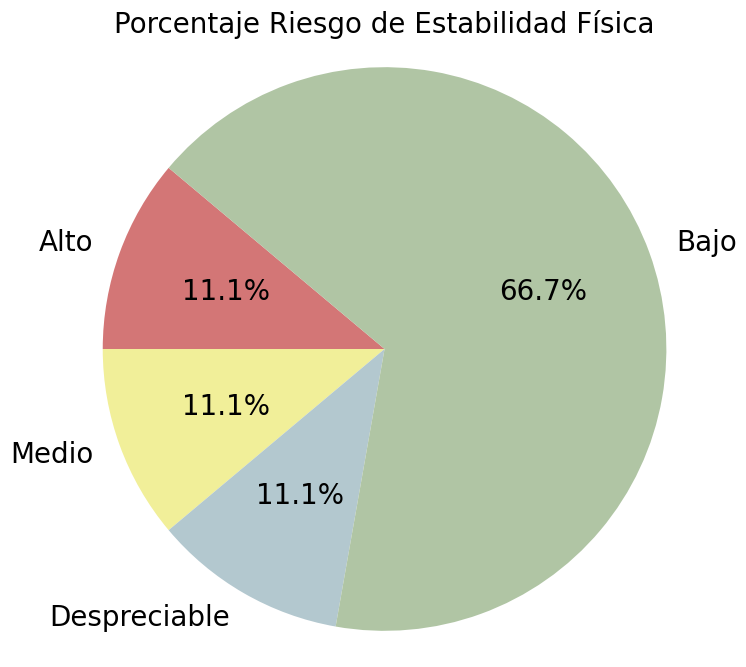

In [52]:
import matplotlib.pyplot as plt

def create_pie_chart(data):
    # Count occurrences of each unique string
    data = []
    for sandia in evaluaciones:
        data.append(sandia[4][1])
    unique_strings = list(set(data))
    counts = [data.count(s) for s in unique_strings]

    color_mapping = {
        'Despreciable': '#B3C8CF',
        'Bajo': '#B0C5A4',
        'Medio': '#F1EF99',
        'Alto': '#D37676'  # If there are additional categories, they will be colored blue
    }

    # Create pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(counts, labels=unique_strings, autopct='%1.1f%%', startangle=140, colors=[color_mapping.get(s, 'blue') for s in unique_strings],
            textprops={'fontsize': 20})  # Adjust font size here
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title('Porcentaje Riesgo de Estabilidad Física', fontsize=20)  # Adjust title font size here
    plt.show()
# Example list of strings
data = ['Apple', 'Banana', 'Orange', 'Apple', 'Orange', 'Orange', 'Banana', 'Apple']

# Create and display pie chart
create_pie_chart(evaluaciones)


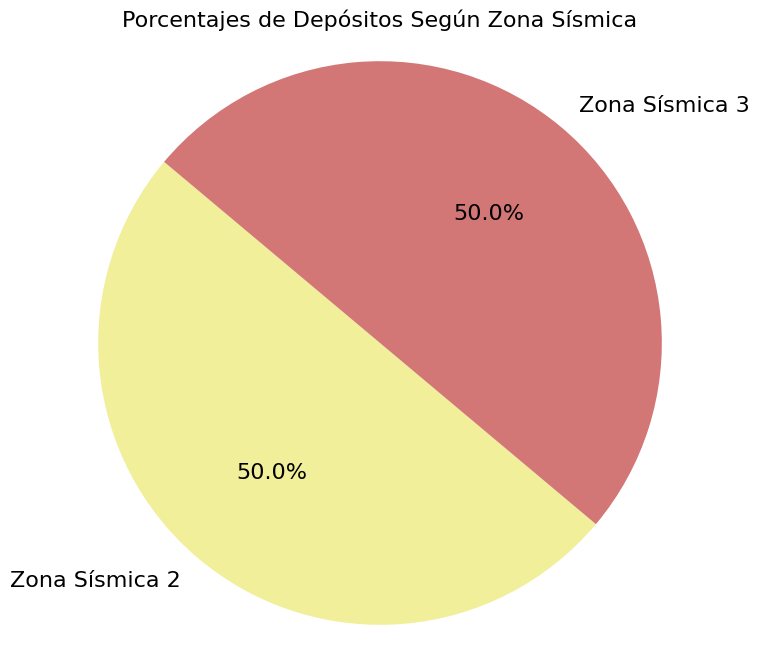

[2.0, 2.0, 2.0, 3.0, 3.0, 3.0]


In [53]:
import matplotlib.pyplot as plt

def create_pie_chart(data):
    # Count occurrences of each unique string
    data = []

    dicZS = {
        0: 'Zona Sísmica 1',
        100: 'Zona Sísmica 2',
        200: 'Zona Sísmica 3',
    }
    for sandia in evaluaciones:
        
        data.append(dicZS[sandia[3][2]])
        

    unique_strings = list(set(data))
    counts = [data.count(s) for s in unique_strings]

    color_mapping = {
        'Zona Sísmica 1': '#B0C5A4',
        'Zona Sísmica 2': '#F1EF99',
        'Zona Sísmica 3': '#D37676',
    }
    # Create pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(counts, labels=unique_strings, autopct='%1.1f%%', startangle=140, colors=[color_mapping.get(s, 'blue') for s in unique_strings],
            textprops={'fontsize': 16})  # Adjust font size here
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title('Porcentajes de Depósitos Según Zona Sísmica', fontsize=16)  # Adjust title font size here
    plt.show()


# Create and display pie chart
create_pie_chart(evaluaciones)


realZonaSismica = []

dicZonasSismicas = {
    
}

for area in listaPathMascarasYGISES[2]:

    realZonaSismica.append(area[8][1])

print(realZonaSismica)

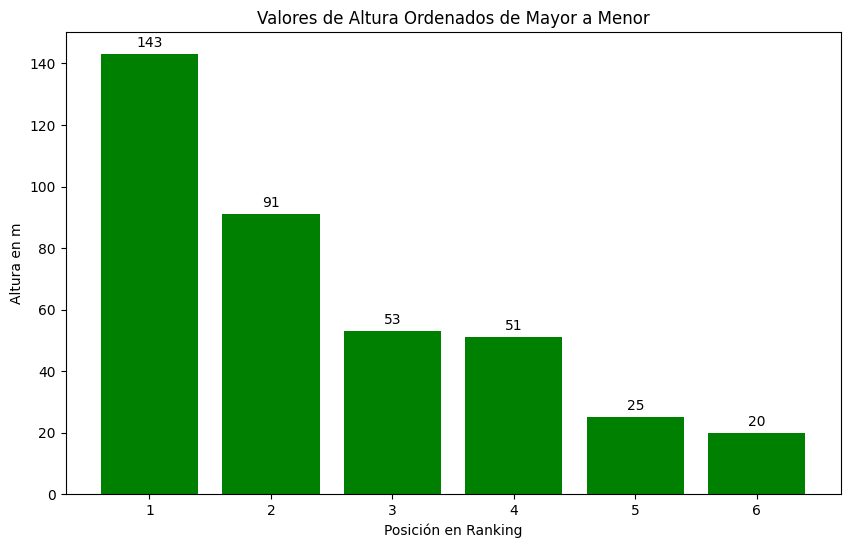

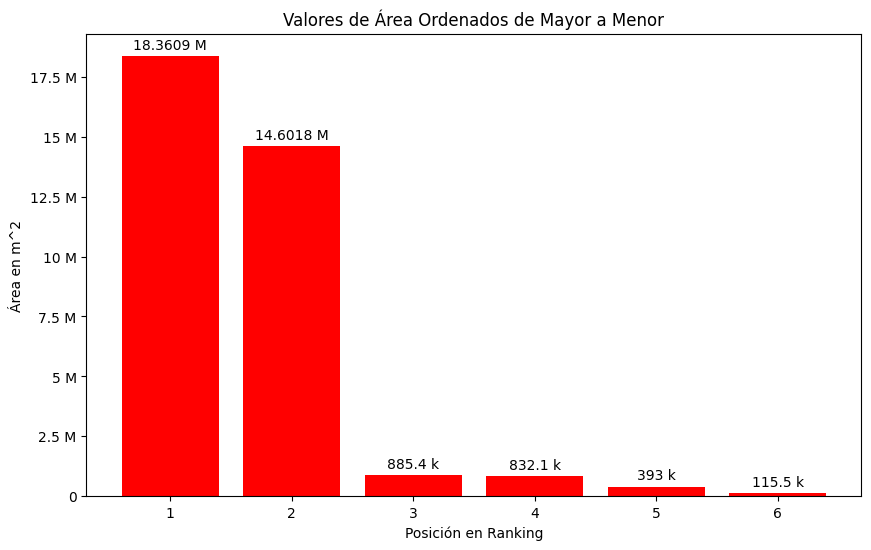

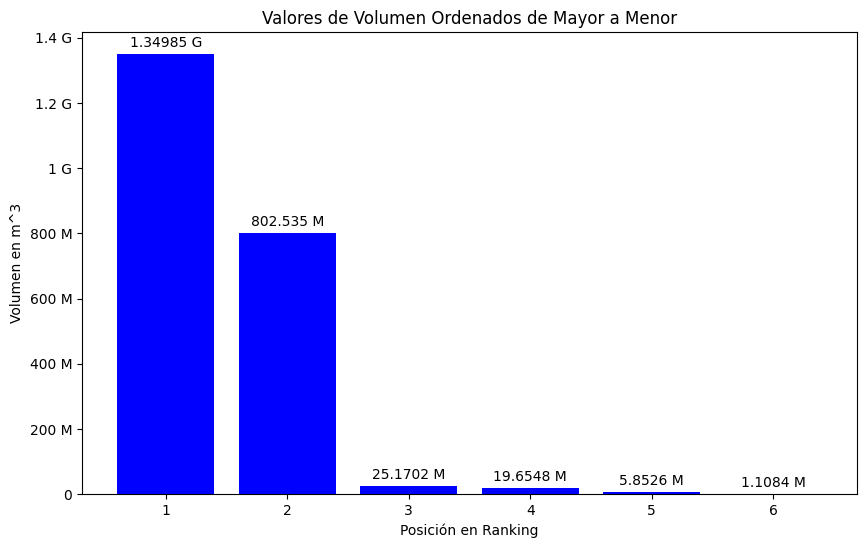

In [38]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def plot_area_values(area_values, titulo, color, label):

    area_values = sorted(area_values, reverse=True)
    # Generate x-coordinates (assuming equal spacing)
    x_values = list(range(1, len(area_values) + 1))

    # Create a figure and axis object
    fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figsize as needed

    # Plot area values
    ax.bar(x_values, area_values, color=color)

    # Add grid
    ax.grid(False)

    # Add labels and title
    ax.set_xlabel('Posición en Ranking')
    ax.set_ylabel(label)
    ax.set_title(f'Valores de {titulo} Ordenados de Mayor a Menor')

    formatter = ticker.EngFormatter()
    ax.yaxis.set_major_formatter(formatter)
    for i, (x, y) in enumerate(zip(x_values, area_values)):
        ax.annotate(formatter(y), (x, y), textcoords="offset points", xytext=(0,5), ha='center')

    # Show plot
    plt.show()



realArea = []
realVolume = []
realAltura = []


for area in listaPathMascarasYGISES[2]:

    realArea.append(area[5][4])
    realVolume.append(area[5][3])
    realAltura.append(area[5][2])

plot_area_values(realAltura, 'Altura', 'green', 'Altura en m')
plot_area_values(realArea, 'Área', 'red', 'Área en m^2')
plot_area_values(realVolume, 'Volumen', 'blue', 'Volumen en m^3')

